In [7]:
import pandas as pd
import json

properties_df = pd.read_json('data/property_listings.json')
properties_df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 376
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   page           377 non-null    int64 
 1   location       377 non-null    object
 2   neighborhood   377 non-null    object
 3   area           377 non-null    object
 4   price          377 non-null    object
 5   fee            377 non-null    object
 6   bedrooms       377 non-null    object
 7   bathrooms      377 non-null    object
 8   parking_spots  377 non-null    object
 9   description    377 non-null    object
 10  url            377 non-null    object
 11  id             377 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 38.3+ KB


In [427]:
contact_agent_df = pd.read_csv('data/contact_agent_dataset.csv')
test_contact_agent_df = pd.read_csv('data/test_contact_agent.csv')
new_data = pd.read_csv('data/new_contact_agent.csv')
new_data.describe()


,query,label
count,30,30
unique,30,1
top,Quiero saber el precio de la casa en la calle ...,other
freq,1,30


In [422]:
new_contact_agent = new_data[new_data['label'] == 'contact agent']
new_other = new_data[new_data['label'] == 'other']

contact_agent_df = pd.merge(contact_agent_df, new_contact_agent[:24], how='outer')
contact_agent_df = pd.merge(contact_agent_df, new_other[:24], how='outer')
contact_agent_df = contact_agent_df.drop_duplicates()

test_contact_agent_df = pd.merge(test_contact_agent_df, new_contact_agent[24:], how='outer')
test_contact_agent_df = pd.merge(test_contact_agent_df, new_other[24:], how='outer')
test_contact_agent_df = test_contact_agent_df.drop_duplicates()

contact_agent_df.to_csv('data/contact_agent_dataset_2.csv', index=False)
test_contact_agent_df.to_csv('data/test_contact_agent_2.csv', index=False)

In [439]:
price_queries_upper = contact_agent_df[contact_agent_df['query'].str.contains('precio')]
price_queries_lower = contact_agent_df[contact_agent_df['query'].str.contains('Precio')]
total_price_queries = pd.merge(price_queries_lower, price_queries_upper, how='outer')
# total_price_queries.to_csv('data/price_queries.csv', index=False)
total_price_queries

,query,label
0,Cuánto es el precio del depa en la Calle Garcí...,other
1,"Ey, ¿cómo están los precios en la Calle Gonzál...",other
2,"Ey, ¿qué tal están los precios en la Calle Rep...",other
3,"Ey, ¿qué tal están los precios en la Calle Shy...",other
4,Quiero saber el precio de la casa en la calle ...,other


### Training Analysis of Roberta model

EPOCHS:  [0.28169014084507044, 0.5633802816901409, 0.8450704225352113, 1.1267605633802817, 1.408450704225352, 1.6901408450704225, 1.971830985915493, 2.2535211267605635, 2.535211267605634, 2.816901408450704, 3.0985915492957745, 3.380281690140845, 3.6619718309859155, 3.943661971830986, 4.225352112676056, 4.507042253521127, 4.788732394366197, 5.0]


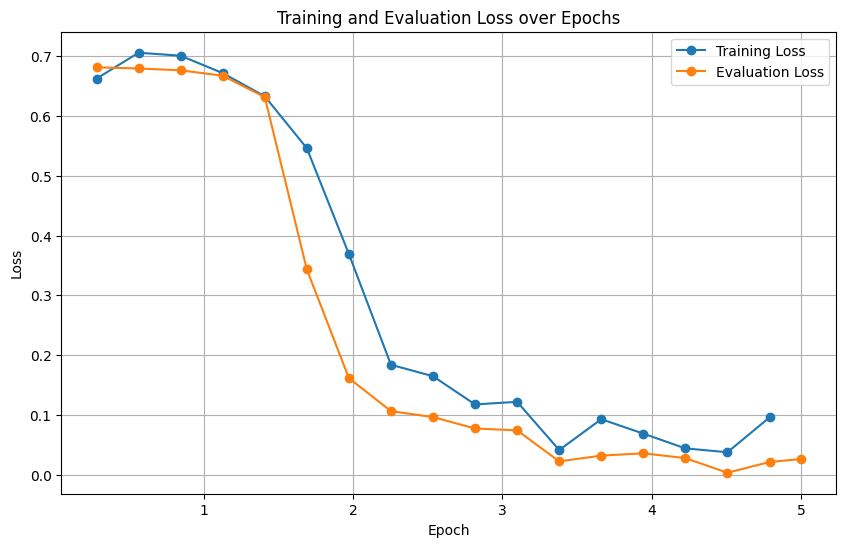

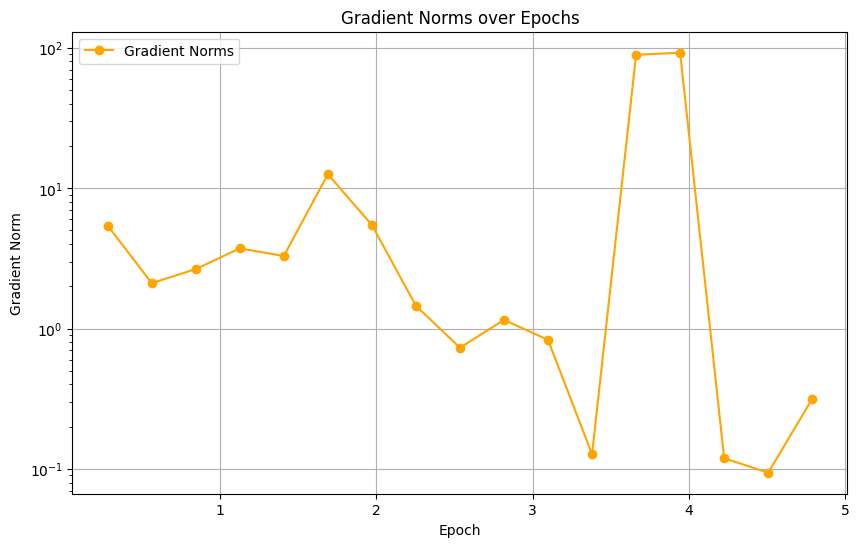

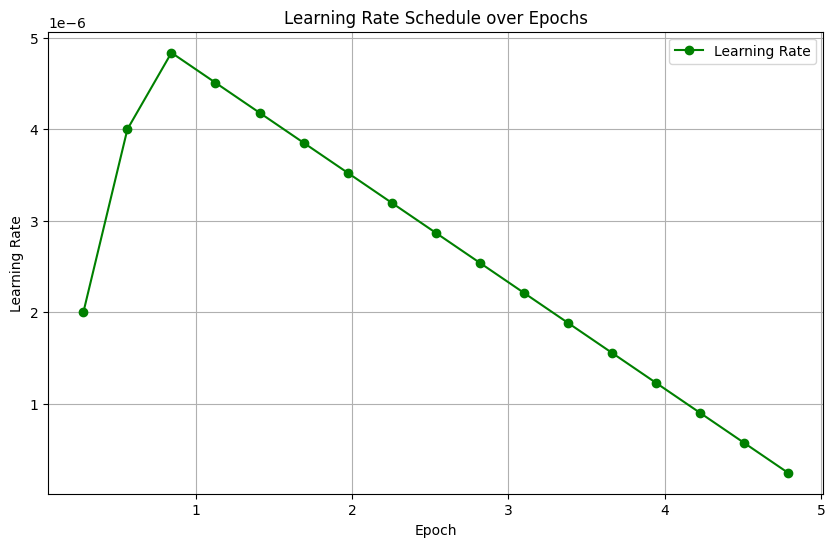

In [441]:
import os
import json
import matplotlib.pyplot as plt

# Define the directory where the model and training logs are saved
output_dir = './results/model-6'

# Load the training history from the 'trainer_state.json' file
trainer_state_file = os.path.join(output_dir, 'log_history.json')
with open(trainer_state_file, 'r') as f:
    log_history = json.load(f)

# Initialize lists to store extracted data
epochs = []
train_loss = []
eval_loss = []
learning_rate = []
grad_norms = []

# Loop over the log history to extract training metrics
for entry in log_history:
    if 'loss' in entry:
        train_loss.append(entry['loss'])
    if 'eval_loss' in entry and 'epoch' in entry:
        epochs.append(entry['epoch'])
        eval_loss.append(entry['eval_loss'])
    if 'learning_rate' in entry:
        learning_rate.append(entry['learning_rate'])
    if 'grad_norm' in entry:
        grad_norms.append(entry['grad_norm'])
print('EPOCHS: ', epochs)

# Convert lists to numpy arrays for consistency in plotting
# epochs = np.array(epochs)
# train_loss = np.array(train_loss)
# eval_loss = np.array(eval_loss)
# learning_rate = np.array(learning_rate)
# grad_norms = np.array(grad_norms)

# Plot Training and Evaluation Loss over Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs[:len(train_loss)], train_loss, label='Training Loss', marker='o')
plt.plot(epochs[:len(eval_loss)], eval_loss, label='Evaluation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Gradient Norms over Epochs
if len(grad_norms) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs[:len(grad_norms)], grad_norms, label='Gradient Norms', marker='o', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient Norm')
    plt.title('Gradient Norms over Epochs')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Learning Rate over Epochs
if len(learning_rate) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs[:len(learning_rate)], learning_rate, label='Learning Rate', marker='o', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Schedule over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()



### Model 324

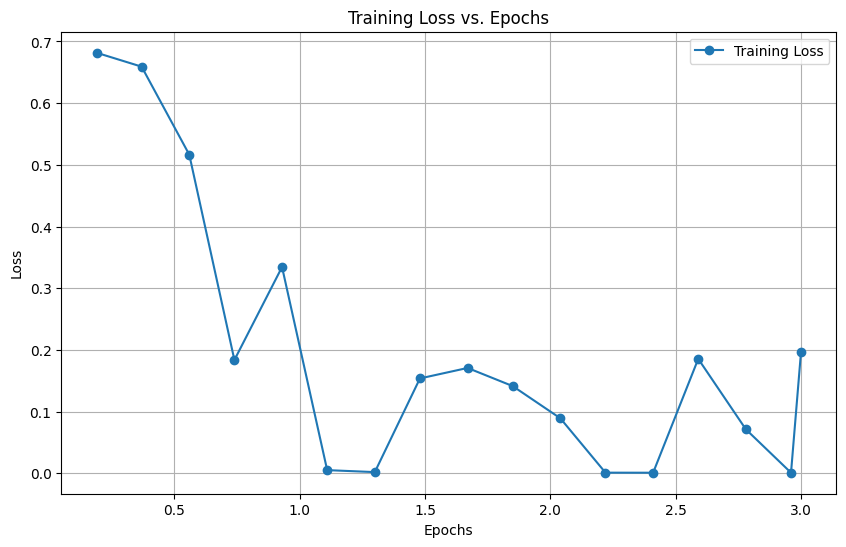

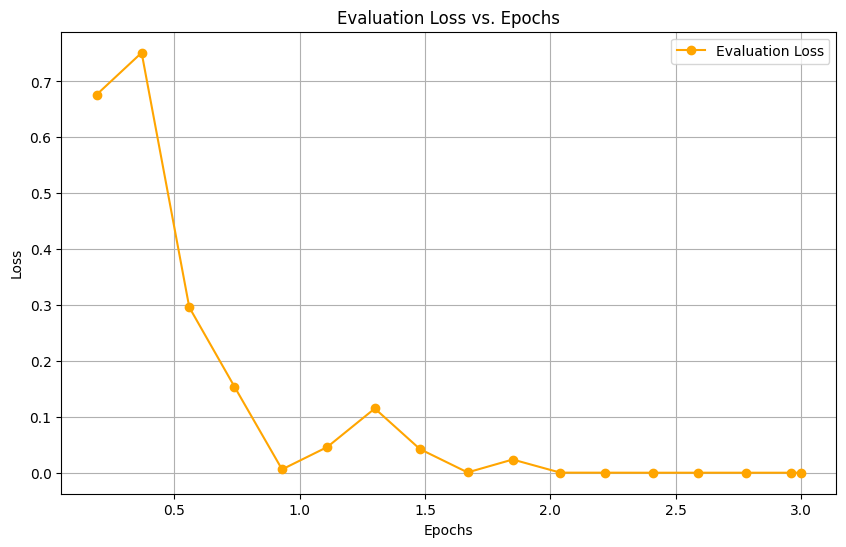

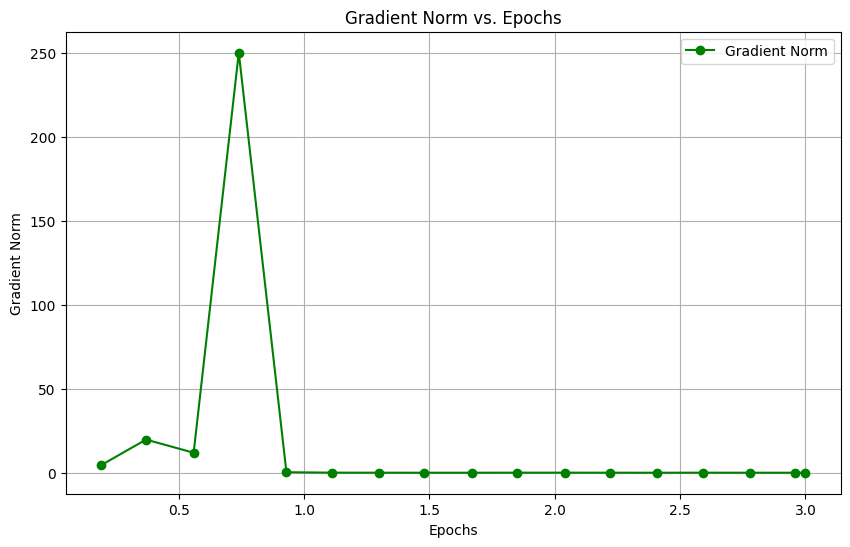

In [375]:
# Example data from your training history
epochs = [0.19, 0.37, 0.56, 0.74, 0.93, 1.11, 1.3, 1.48, 1.67, 1.85, 2.04, 2.22, 2.41, 2.59, 2.78, 2.96, 3.0]
training_loss = [0.6817, 0.6591, 0.5165, 0.1837, 0.3344, 0.0052, 0.002, 0.1538, 0.1708, 0.1414, 0.0892, 0.0011, 0.001, 0.1855, 0.0713, 0.001, 0.19740721251510865]
eval_loss = [0.6762, 0.7514, 0.2962, 0.1544, 0.0063, 0.0462, 0.1152, 0.0426, 0.000897, 0.02396, 0.000486, 0.000433, 0.000353, 0.000387, 0.000376, 0.000365, 0.0003654308384284377]
gradient_norm = [4.4306, 19.7428, 11.9147, 249.9241, 0.3108, 0.0638, 0.0367, 0.0179, 0.0259, 0.0547, 0.0585, 0.0341, 0.0191, 0.0449, 0.0241, 0.0198, 0.0198]

# 1. Training Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 2. Evaluation Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, eval_loss, label='Evaluation Loss', marker='o', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Evaluation Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 3. Gradient Norm vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, gradient_norm, label='Gradient Norm', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()


array(['¿Puede proporcionar información sobre los restaurantes locales?',
       'other'], dtype=object)

In [87]:
properties_df = properties_df[properties_df['page'] < 14]
duplicates = properties_df[properties_df.loc[:, 'location':].duplicated()]
duplicates.count()

page             48
location         48
neighborhood     48
area             48
price            48
fee              48
bedrooms         48
bathrooms        48
parking_spots    48
description      48
url              48
dtype: int64

In [89]:
properties_df['location'].describe()
properties_df[properties_df['location'] == 'Urbanización El Condado']

,page,location,neighborhood,area,price,fee,bedrooms,bathrooms,parking_spots,description,url
109,4,Urbanización El Condado,N/A,122 m² tot.,USD 129.900,N/A,2 baños,2 estac.,N/A,N/A,plusvalia.comN/A
152,6,Urbanización El Condado,"El Condado, Quito",122 m² tot.,USD 129.900,USD 145 Alícuota,2 baños,2 estac.,N/A,¡excelente oportunidad! En la Urb. El Condado ...,plusvalia.com/propiedades/clasificado/veclapin...
325,11,Urbanización El Condado,N/A,188 m² tot.,USD 155.000,N/A,3 hab.,2 estac.,N/A,N/A,plusvalia.comN/A
348,12,Urbanización El Condado,N/A,356 m² tot.,USD 264.900,N/A,4 hab.,4 baños,4 estac.,N/A,plusvalia.comN/A


In [90]:
duplicates[duplicates['location'] == 'Urbanización El Condado']

,page,location,neighborhood,area,price,fee,bedrooms,bathrooms,parking_spots,description,url


In [ ]:
duplicates

In [74]:
duplicates[duplicates['location'] == 'cashapamba']

,page,location,neighborhood,area,price,fee,bedrooms,bathrooms,parking_spots,description,url
32,2,cashapamba,"Sangolqui, Quito",2345 m² tot.,USD 258.000,USD 20 Alícuota,2 hab.,3 baños,6 estac.,Linda quinta terreno 2345m2 dentro de conjunto...,plusvalia.com/propiedades/clasificado/veclhqin...


,page,location,neighborhood,area,price,fee,bedrooms,bathrooms,parking_spots,description,url
408,16,Ponceano,N/A,115 m² tot.,USD 87.000,N/A,3 hab.,2 baños,2 estac.,N/A,plusvalia.comN/A
409,16,moran,N/A,130 m² tot.,USD 47.000,N/A,3 hab.,2 baños,1 estac.,N/A,plusvalia.comN/A
410,16,Calderón Av. Carlos Mantilla,N/A,140 m² tot.,USD 50.000,N/A,3 hab.,2 baños,1 estac.,N/A,plusvalia.comN/A
411,16,Eloy Alfaro y Gaspar de Villarroel,N/A,400 m² tot.,USD 200.000,N/A,4 hab.,4 baños,2 estac.,N/A,plusvalia.comN/A
412,16,calle de entrada a Llano Grande García Moreno ...,N/A,126 m² tot.,USD 47.000,N/A,4 hab.,3 baños,1 estac.,N/A,plusvalia.comN/A
413,16,Santa Eulalia,N/A,2078 m² tot.,USD 78.900,N/A,N/A,N/A,N/A,N/A,plusvalia.comN/A
414,16,Pomasqui,N/A,120 m² tot.,USD 105.000,N/A,3 hab.,2 baños,2 estac.,N/A,plusvalia.comN/A
415,16,republica y pradera,N/A,135 m² tot.,USD 79.000,N/A,2 hab.,3 baños,1 estac.,N/A,plusvalia.comN/A
416,16,N12 BENJAMIN CARRION - E9-,N/A,267 m² tot.,USD 99.000,N/A,3 hab.,3 baños,2 estac.,N/A,plusvalia.comN/A
417,16,Alangasi,N/A,763 m² tot.,USD 290.000,N/A,4 hab.,7 baños,5 estac.,N/A,plusvalia.comN/A


,page,location,neighborhood,area,price,fee,bedrooms,bathrooms,parking_spots,description,url
31,2,Gonzalez Súarez,"González Suárez, Quito",344 m² tot.,USD 2.262,USD 1 Alícuota,3 hab.,4 baños,4 estac.,"Valor renta $2262, 00 (incluye alícuota) Depar...",plusvalia.com/propiedades/clasificado/alclapin...


In [21]:
property = properties_df[properties_df['price'].str.contains('USD 127.500')]
property

,page,location,neighborhood,area,price,fee,bedrooms,bathrooms,parking_spots,description
149,6,urbanización san rafael,N/A,275 m² tot.,USD 127.500,N/A,3 hab.,2 baños,2 estac.,N/A


In [16]:
property_description = property['description']
property_description

'En el corazón del Valle de los Chillos vendo hermosa casa con amplios y elegantes espacios ideal para distrutarla en familia, esta dentro de urbanización qué tiene áreas verdes, parques, área para patinaje, excelente entorno, clima, ubicación. La casa está distribuida de la siguiente manera: Amplio jardín de entrada. Sala comedor amplios. Cocina con family room. 3 habitaciones amplias con baño completo. 1 habitación máster super amplia con ventanales de pared a techo, closet y walking closet. Todos los muebles son personalizados y funcionales, la casa está domotizada. Área de lavandería. Bodega muy bien dispuesta. Baño completo de servicio. Baño de visitas completo. Piscina temperada con iluminación. Patio área de bbq. Sala familia con mesa de Poker con usb, Bar, baño completo, con acceso directo al jardín y a la piscina. Estacionamiento para 5 vehículos. Un propiedad con mucho estilo. Ideal para usted'